In [5]:
#This block only looks at the precent of set flowers

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widg
import copy

In [9]:
Number_of_Data_Sets = 8
Truss_Level = 201
a=[0]*Number_of_Data_Sets

for i in range(1,Number_of_Data_Sets+1):
    Data_Set = i
    df = pd.read_csv('C:\\Users\\Reily\\Desktop\\Beeyond Data\\data_set_'+str(Data_Set)+'.csv')
    df = df.fillna(0)
    df.columns = [c.replace(' ', '_') for c in df.columns]

    #make a unrefrenced copy of our data frame
    df1 = copy.deepcopy(df)

    #reduce data by truss level
    df2 = df1.loc[(df1.Truss == Truss_Level)]

    #group data by device
    dfGroupByDevice = df2.groupby(df2.Device).sum()

    #normalize the setting flowers per device based on total flowers per device

    dfGroupByDevice.Setting = dfGroupByDevice.Setting.div(dfGroupByDevice.Total_flowers)
    dfGroupByDevice.Setting = 100*dfGroupByDevice.Setting

    #making data frame of device and percent setting
    dfGroupByDevice = dfGroupByDevice[['Setting']]
    dfGroupByDevice
    dfGroupByDevice.columns = ['% Setting Day ' + str(i)] 
    a[i-1]= dfGroupByDevice
    
bigFrame = pd.concat(a, axis=1)
bigFrame



,% Setting Day 1,% Setting Day 2,% Setting Day 3,% Setting Day 4,% Setting Day 5,% Setting Day 6,% Setting Day 7,% Setting Day 8
Device,,,,,,,,
A,0,0,0.000000,3.070175,17.040359,20.416667,35.426009,49.693252
B,0,0,0.000000,0.574713,12.429379,19.672131,27.683616,42.857143
C,0,0,0.000000,3.802281,19.531250,22.388060,35.971223,48.897059
E,0,0,0.000000,0.000000,5.072464,8.571429,14.184397,22.916667
F,0,0,2.985075,6.140351,22.560976,29.605263,34.939759,48.466258


<function __main__.plotData>

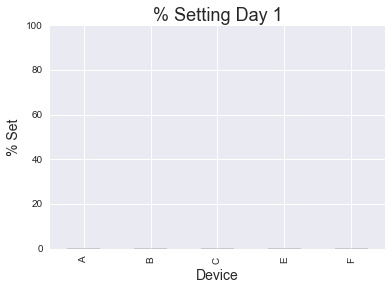

In [10]:
def plotData(day):
    plt.xlabel('Treatment', fontsize = 14)
    plt.ylabel('% Set', fontsize = 14)
    plt.title('% Setting Day ' + str(int (day)),fontsize = 18)
    plt.grid(False)
    plt.ylim([0,100])
    bigFrame['% Setting Day ' + str(int (day))].plot(kind='bar',)

timeSlider = widg.FloatSlider(description='Time', min=1, max=Number_of_Data_Sets, step=1)

widg.interact(plotData,
            day=timeSlider)

In [11]:
a1=[0]*(Number_of_Data_Sets-1)
#make a shifted data frame of the previous data
shiftedBigFrame = bigFrame.shift(periods=-1,axis=1).fillna(0)
#subtract the big frame from the shifted
deltaBigFrame=shiftedBigFrame.subtract(bigFrame)

#delet last colomn because it will go negitive
del deltaBigFrame['% Setting Day ' + str(Number_of_Data_Sets)]

#rename headers
for i in range(1,Number_of_Data_Sets):
    deltaBigFrame.rename(columns={'% Setting Day ' + str(i):'% Delta Setting Day ' + str(i)+' & '+str(i+1)}, inplace=True)
    
deltaBigFrame

,% Delta Setting Day 1 & 2,% Delta Setting Day 2 & 3,% Delta Setting Day 3 & 4,% Delta Setting Day 4 & 5,% Delta Setting Day 5 & 6,% Delta Setting Day 6 & 7,% Delta Setting Day 7 & 8
Device,,,,,,,
A,0,0.000000,3.070175,13.970183,3.376308,15.009342,14.267243
B,0,0.000000,0.574713,11.854666,7.242753,8.011485,15.173527
C,0,0.000000,3.802281,15.728969,2.856810,13.583163,12.925836
E,0,0.000000,0.000000,5.072464,3.498965,5.612969,8.732270
F,0,2.985075,3.155276,16.420625,7.044288,5.334496,13.526499
